### 230319 하은서 복습

### 결측치

In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame({'이름': ['홍길동','김영희','김철수'],
                   '성적':[100,80,np.nan],
                   '등급':['A', np.nan, 'B']})
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [4]:
# 결측치 확인
df.isna().sum()

이름    0
성적    1
등급    1
dtype: int64

In [5]:
# 결측치 제거 방법 -> dropna( subset = )
df.dropna( subset= ['성적'], inplace=True)  #원본 바꾸려면 inplace 필수 사용

In [6]:
# 전체 모든 NA 값 제거
df.dropna()

,이름,성적,등급
0,홍길동,100.0,A


In [7]:
# NA값 제외한 합계
df.성적.sum()

180.0

In [10]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [12]:
df['성적']+100

0    200.0
1    180.0
2      NaN
Name: 성적, dtype: float64

In [13]:
# NA값 제외한 평균
df.성적.mean()

90.0

In [14]:
df.이름.value_counts().sum()

3

In [15]:
df.등급.value_counts().sum()

2

In [16]:
df.shape

(3, 3)

In [18]:
exam = pd.read_csv('exam.csv')
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [28]:
exam.loc[[3,8,9,15],['english']] = np.nan

In [20]:
exam.isna().sum()

id         0
nclass     0
math       0
english    4
science    0
dtype: int64

In [26]:
exam

,id,nclass,math,english,science
0,1,1,50,98.0,50
1,2,1,60,97.0,60
2,3,1,45,86.0,78
3,4,1,30,0.0,58
4,5,2,25,80.0,65
5,6,2,50,89.0,98
6,7,2,80,90.0,45
7,8,2,90,78.0,25
8,9,3,20,0.0,15
9,10,3,50,0.0,45


In [27]:
exam.english.mean()

65.3

In [23]:
# NA값 대체하는 방법 -> fillna()
# 결측치에 0을 넣는 경우
exam['english'] = exam['english'].fillna(0)

In [24]:
exam.english.mean()

65.3

In [29]:
# 결측치에 평균값을 넣는 경우
exam['english'] = exam['english'].fillna(81.6)

In [30]:
exam.english.mean()

81.62

### 이상치

In [31]:
mpg = pd.read_csv('mpg.csv')

In [32]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [33]:
import seaborn as sns

<Axes: ylabel='cty'>

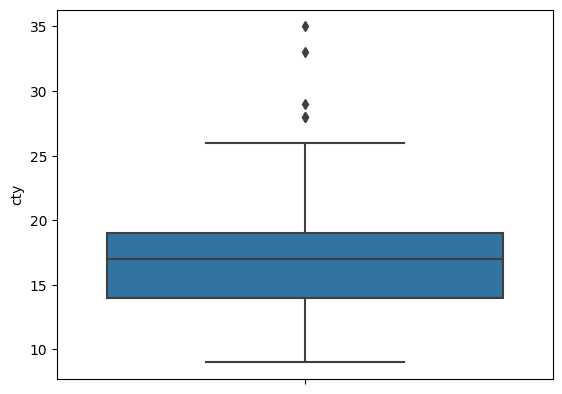

In [36]:
# 수치형 데이터만 확인 가능
sns.boxplot(data= mpg, y = 'cty')

In [37]:
# IQR 극단치 기준값 구하기
# quantile()

p25 = mpg['cty'].quantile(0.25)
p75 = mpg['cty'].quantile(0.75)

print(p25)
print(p75)

14.0
19.0


In [38]:
# iqr은 1사분위수와 3사분위수의 거리를 나타낸 것
iqr= p75-p25
iqr

5.0

In [39]:
# 아래 하한선 p25 - 1.5 * iqr
p25 - 1.5*iqr

6.5

In [40]:
# 위 상한선 p75 + 1.5 * iqr
p75 + 1.5 * iqr

26.5

In [41]:
np.where((mpg['cty']< 6.5) | (mpg['cty']>26.5))

(array([ 99, 196, 212, 221, 222], dtype=int64),)

In [42]:
mpg['cty']=np.where((mpg['cty'] <6.5)| (mpg['cty']>26.5), np.nan, mpg['cty'])

In [43]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             0
fl              0
category        0
dtype: int64

In [44]:
mpg_1 = mpg.dropna()

In [45]:
mpg_1.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<Axes: ylabel='cty'>

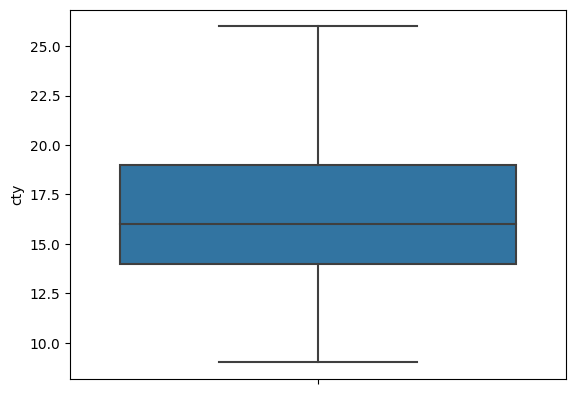

In [48]:
sns.boxplot(data=mpg_1, y = 'cty')

In [50]:
# 이상치 제거 후
mpg_1.cty.mean()

16.558951965065503

In [51]:
# 이상치 제거 전
mpg.cty.mean()

16.558951965065503

### loc iloc

In [52]:
mpg['cty']

0      18.0
1      21.0
2      20.0
3      21.0
4      16.0
       ... 
229    19.0
230    21.0
231    16.0
232    18.0
233    17.0
Name: cty, Length: 234, dtype: float64

In [53]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21.0,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19.0,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21.0,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16.0,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18.0,26,p,midsize


In [54]:
# loc -> 인덱스기준 값 추출
mpg.loc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [55]:
mpg.loc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact


In [58]:
# iloc -> 행 번호 기준
mpg.iloc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [57]:
mpg.iloc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact


In [60]:
# loc과 iloc 비교
mpg_sp = mpg.loc[[0,2,4,6,8]]
mpg_sp 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18.0,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16.0,25,p,compact


In [61]:
mpg_sp.loc[4]

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                 16.0
hwy                   26
fl                     p
category         compact
Name: 4, dtype: object

In [62]:
mpg_sp.iloc[4]

manufacturer          audi
model           a4 quattro
displ                  1.8
year                  1999
cyl                      4
trans             auto(l5)
drv                      4
cty                   16.0
hwy                     25
fl                       p
category           compact
Name: 8, dtype: object

In [63]:
mpg_sp.iloc[6]

IndexError: single positional indexer is out-of-bounds

In [64]:
mpg_sp.loc[6]

manufacturer        audi
model                 a4
displ                3.1
year                2008
cyl                    6
trans           auto(av)
drv                    f
cty                 18.0
hwy                   27
fl                     p
category         compact
Name: 6, dtype: object

In [65]:
for i in range(10):
    print(mpg.loc[i])

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                 18.0
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object
manufacturer          audi
model                   a4
displ                  1.8
year                  1999
cyl                      4
trans           manual(m5)
drv                      f
cty                   21.0
hwy                     29
fl                       p
category           compact
Name: 1, dtype: object
manufacturer          audi
model                   a4
displ                  2.0
year                  2008
cyl                      4
trans           manual(m6)
drv                      f
cty                   20.0
hwy                     31
fl                       p
category           compact
Name: 2, dtype: object
manufacturer        audi
model                 a4
displ       